**MNIST project**
Classification using csv, based on number MNIST (original) dataset

Importing libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
train=pd.read_csv('mnist_train.csv')
test=pd.read_csv('mnist_test.csv')

In [5]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [10]:
train['label'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

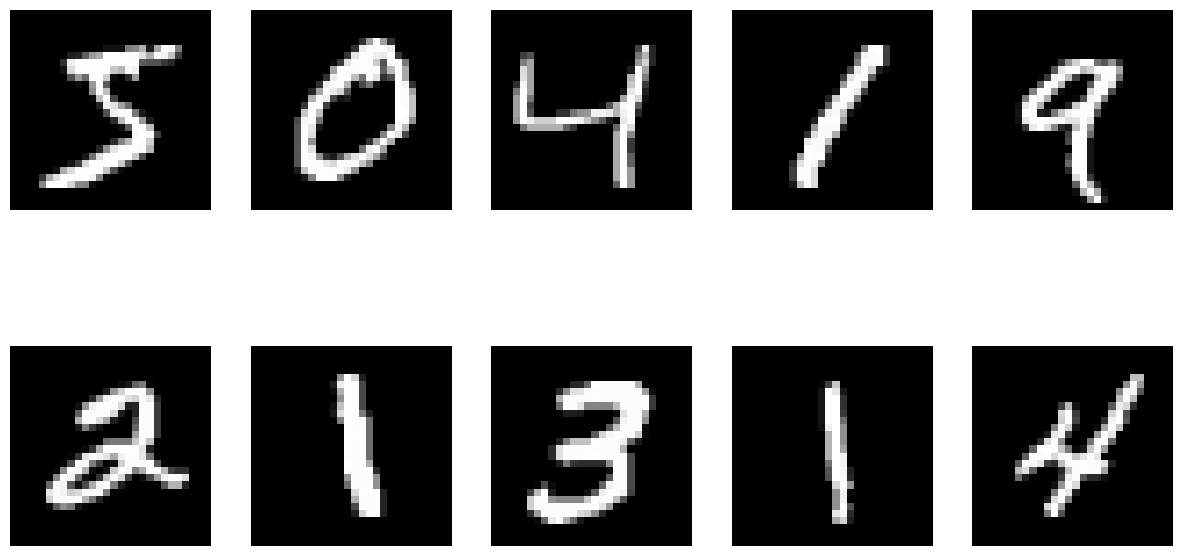

In [11]:
img_height,img_width = 28,28
fig, axes = plt.subplots(figsize=(15,8), nrows=2, ncols=5, sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(train.iloc[i,1:].to_numpy().reshape(img_height,img_width), cmap='gray')
    ax.axis('off')
plt.show()

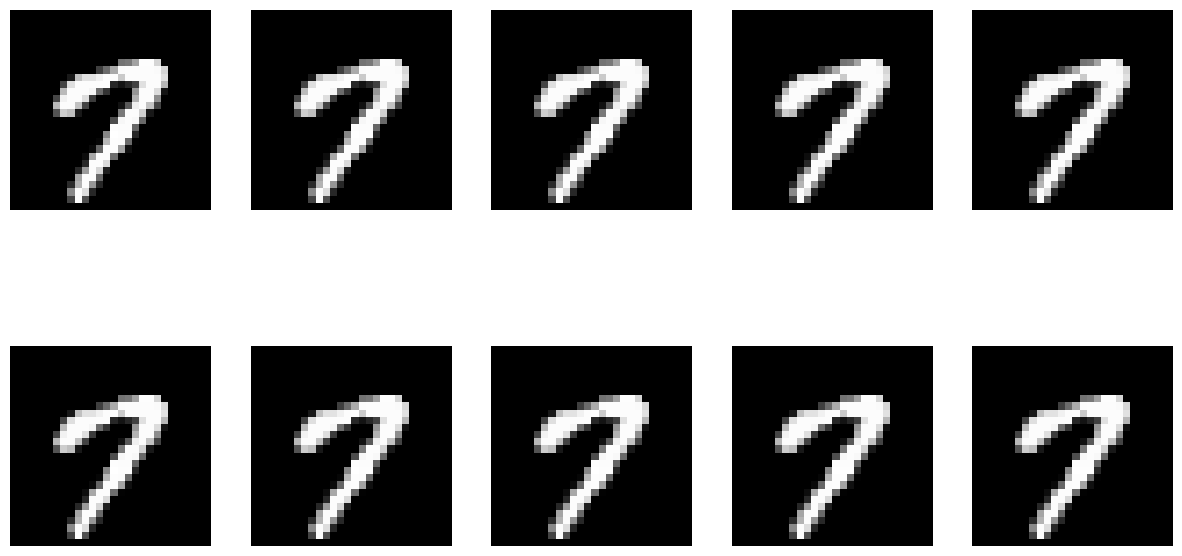

In [12]:
img_height,img_width = 28,28
fig, axes = plt.subplots(figsize=(15,8), nrows=2, ncols=5, sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(train.iloc[15,1:].to_numpy().reshape(img_height,img_width), cmap='gray')
    ax.axis('off')
plt.show()

In [13]:
for index in train[train['label'] == 8].index:
    print(index)

17
31
41
46
55
85
94
97
125
137
144
146
160
188
197
202
225
240
245
265
295
300
312
333
343
348
352
368
386
393
404
415
418
439
445
456
469
485
499
503
517
528
532
539
545
559
571
575
594
602
615
627
628
685
694
705
708
720
725
726
734
736
740
756
758
761
766
769
777
784
791
792
796
817
823
831
858
865
876
885
913
923
925
935
963
972
976
1009
1013
1016
1025
1026
1045
1059
1063
1064
1067
1086
1101
1105
1120
1141
1170
1193
1207
1214
1219
1223
1236
1237
1239
1247
1254
1267
1279
1289
1294
1296
1319
1329
1339
1344
1362
1384
1388
1404
1419
1434
1439
1453
1457
1464
1475
1484
1505
1519
1534
1542
1543
1593
1598
1616
1621
1641
1657
1666
1713
1745
1749
1758
1759
1760
1773
1776
1777
1780
1783
1788
1790
1793
1804
1853
1856
1873
1893
1901
1914
1943
1948
1964
1966
1974
2001
2002
2013
2016
2026
2030
2043
2057
2063
2067
2068
2070
2077
2097
2117
2124
2135
2139
2150
2155
2170
2175
2194
2210
2215
2231
2237
2243
2265
2285
2302
2303
2349
2358
2369
2378
2382
2383
2384
2388
2394
2400
2413
2421
2425
2442
2444


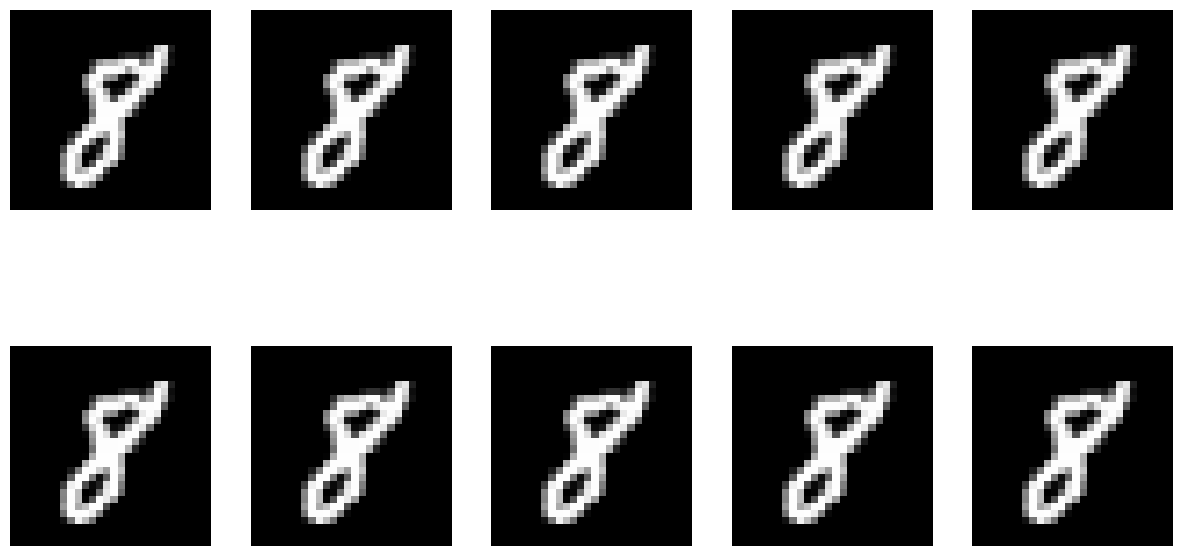

In [14]:
img_height,img_width = 28,28
fig, axes = plt.subplots(figsize=(15,8), nrows=2, ncols=5, sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(train.iloc[17,1:].to_numpy().reshape(img_height,img_width), cmap='gray')
    ax.axis('off')
plt.show()

In [15]:
train.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [16]:
train.dropna()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X = train.drop('label', axis=1)
Y = train['label']

*Spliting the data using train test split*

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42, test_size=0.2)

*scaling the test and train data using standard scaler*

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_fit = scaler.transform(X_test)

*Creating model*

In [20]:
svc_model = SVC(kernel='linear',random_state=42)
svc_model.fit(X_train,Y_train)
y_pred = svc_model.predict(X_test)

d:\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [21]:
y_pred

array([7, 3, 8, ..., 9, 7, 2], dtype=int64)

In [22]:
accuracy = accuracy_score(Y_test,y_pred)

In [23]:
accuracy

0.8191666666666667

In [24]:
print(f"Accuracy score: {accuracy}\n\n")

Cfm=confusion_matrix(Y_test,y_pred)
print(f"confusion_matrix: {Cfm} \n\n")

Cls_rep = classification_report(Y_test,y_pred)
print(f"classification_report: {Cls_rep}")

Accuracy score: 0.8191666666666667


confusion_matrix: [[1150    0    3    1    3    2    2    1   12    1]
 [   1 1037   11    8    1    0    3    1  260    0]
 [  17   19  937   42   25    0   30   15   83    6]
 [  14    3   13 1095    3    5    1    0   81    4]
 [   8    1    2    1 1091    0    8    1    8   56]
 [  98   10   17  161   25  327   25    2  415   24]
 [  24    0    7    3   12    1 1122    1    7    0]
 [  16    4   25  108   31    0    0 1032   40   43]
 [   9    3    4   17    4    0   12    1 1108    2]
 [  17    3    9   40   96    0    1   20   77  931]] 


classification_report:               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1175
           1       0.96      0.78      0.86      1322
           2       0.91      0.80      0.85      1174
           3       0.74      0.90      0.81      1219
           4       0.85      0.93      0.88      1176
           5       0.98      0.30      0.45      1104
         

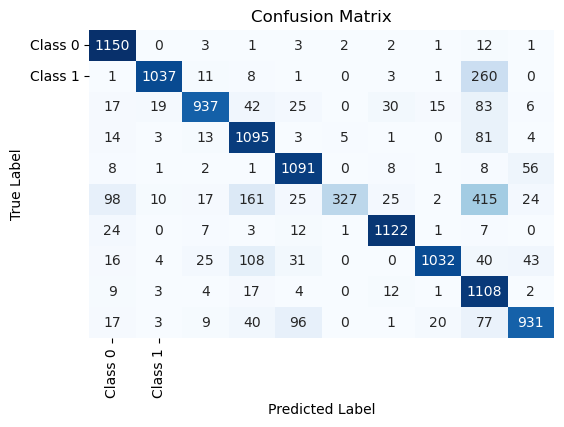

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(Cfm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

till now we have analyzed the entire dataset and prepared a support vector machine model, with the help of it we are able to achieve accuracy of 81 (without any hyperparameter tuning), now we will aim for a better accuracy by using different features

so now what's our plan?

We will first also find the test accuracy
then we will try out hyperparameters tuning
then we will try out different scalling techniques

*finding the test accuracy*

In [26]:
y_test_pred = svc_model.predict(X_test)

d:\anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [27]:
accuracy_test = accuracy_score(Y_test, y_test_pred)

In [28]:
accuracy_test

0.8191666666666667

In [29]:
from sklearn.model_selection import GridSearchCV


In [30]:
params = { 'C':[0.1,0.5],
          'kernel': ['sigmoid','poly'],
          'gamma':['scale'],
          }

In [31]:
grid_search = GridSearchCV(estimator=svc_model, param_grid=params,scoring='accuracy',cv=5,verbose=2,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,Y_train)

best_params=grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
